In [1]:
## 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## 2. Read the Datasets
# Load cases and vaccination data
cases_df = pd.read_csv("cases_malaysia.csv")
vax_df = pd.read_csv("vax_malaysia.csv")

# Convert dates
cases_df["date"] = pd.to_datetime(cases_df["date"])
vax_df["date"] = pd.to_datetime(vax_df["date"])

# Preview
cases_df.head(), vax_df.head()


(        date  cases_new  cases_import  cases_recovered  cases_active  \
 0 2020-01-25          4             4                0             4   
 1 2020-01-26          0             0                0             4   
 2 2020-01-27          0             0                0             4   
 3 2020-01-28          0             0                0             4   
 4 2020-01-29          3             3                0             7   
 
    cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
 0              0            4           0           0            0  ...   
 1              0            0           0           0            0  ...   
 2              0            0           0           0            0  ...   
 3              0            0           0           0            0  ...   
 4              0            3           0           0            0  ...   
 
    cases_60_69  cases_70_79  cases_80  cluster_import  cluster_religious  \
 0            0          

In [3]:
## 3. Merge the Datasets
merged_df = pd.merge(cases_df, vax_df, on="date", how="inner")

merged_df.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
0,2021-02-24,3545,1,3331,30673,2483,3545,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2021-02-25,1924,6,3752,28832,705,1924,0,0,0,...,0,0,0,0,0,0,3,0,0,0
2,2021-02-26,2253,7,3085,27990,1136,2253,0,0,0,...,0,0,0,0,0,0,7,0,0,0
3,2021-02-27,2364,1,3320,27024,1100,2364,0,0,0,...,0,0,0,0,0,0,21,0,0,0
4,2021-02-28,2437,1,3251,26201,1404,2437,0,0,0,...,0,0,0,0,0,0,4,0,0,0


In [4]:
## 4. Filter for the Best 6-Month Window
mask = (merged_df["date"] >= "2021-07-01") & (merged_df["date"] <= "2021-12-31")
filtered_df = merged_df.loc[mask, ["date", "cases_new", "cumul_partial", "cumul_full", "cumul_booster"]]

filtered_df.head()

,date,cases_new,cumul_partial,cumul_full,cumul_booster
127,2021-07-01,6988,6148466,2429925,0
128,2021-07-02,6982,6318731,2500693,0
129,2021-07-03,6658,6463574,2580136,0
130,2021-07-04,6045,6598705,2661027,0
131,2021-07-05,6387,6805355,2782600,0


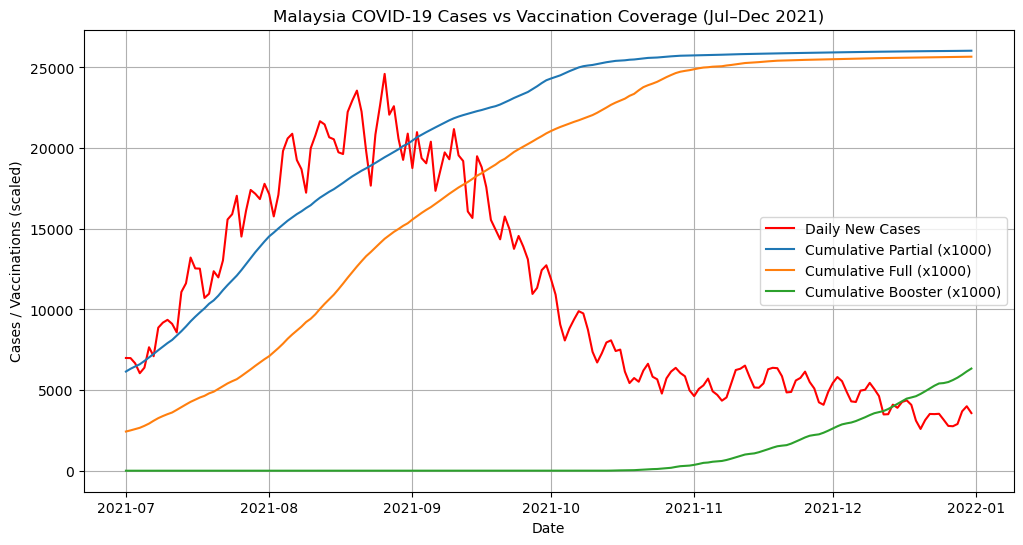

In [5]:
## 5. Plot Cases vs Vaccination Coverage
plt.figure(figsize=(12,6))

# Plot cases (left axis)
plt.plot(filtered_df["date"], filtered_df["cases_new"], color="red", label="Daily New Cases")

# Plot vaccination coverage (scaled down for visibility)
plt.plot(filtered_df["date"], filtered_df["cumul_partial"]/1000, label="Cumulative Partial (x1000)")
plt.plot(filtered_df["date"], filtered_df["cumul_full"]/1000, label="Cumulative Full (x1000)")
plt.plot(filtered_df["date"], filtered_df["cumul_booster"]/1000, label="Cumulative Booster (x1000)")

plt.title("Malaysia COVID-19 Cases vs Vaccination Coverage (Jul–Dec 2021)")
plt.xlabel("Date")
plt.ylabel("Cases / Vaccinations (scaled)")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Step 5: Choose Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Features (vaccination coverage data) and target (cases)
X = merged_df[['cumul_partial', 'cumul_full', 'cumul_booster']]  # adjust if column names differ
y = merged_df['cases_new']  # daily new cases

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [9]:
# Step 6: Train models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Linear Regression RMSE:", rmse_linear)
print("Random Forest RMSE:", rmse_rf)


Linear Regression RMSE: 2322.6252993825756
Random Forest RMSE: 148.02600765563378
